In [1]:
### Data Collection
import pandas_datareader as pdr
key="777188ec604cc433ed7cc1d272f7d01392053130"

In [ ]:
initial_df = pdr.get_data_tiingo('AAPL', api_key="777188ec604cc433ed7cc1d272f7d01392053130")

In [5]:
initial_df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
initial_df=pd.read_csv('AAPL.csv')

In [8]:
initial_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-01-23 00:00:00+00:00,120.08,120.81,119.77,120.00,22050218,28.253887,28.425650,28.180946,28.235064,88200872,0.0,1.0
1,AAPL,2017-01-24 00:00:00+00:00,119.97,120.10,119.50,119.55,23211038,28.228005,28.258593,28.117417,28.129182,92844152,0.0,1.0
2,AAPL,2017-01-25 00:00:00+00:00,121.88,122.10,120.28,120.42,32586673,28.677413,28.729177,28.300945,28.333886,130346692,0.0,1.0
3,AAPL,2017-01-26 00:00:00+00:00,121.94,122.44,121.60,121.67,26337576,28.691530,28.809177,28.611531,28.628002,105350304,0.0,1.0
4,AAPL,2017-01-27 00:00:00+00:00,121.95,122.35,121.60,122.14,20562944,28.693883,28.788000,28.611531,28.738589,82251776,0.0,1.0


In [9]:
initial_df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2022-01-13 00:00:00+00:00,172.19,176.62,171.790,175.78,84505760,172.19,176.62,171.790,175.78,84505760,0.0,1.0
1255,AAPL,2022-01-14 00:00:00+00:00,173.07,173.78,171.090,171.34,80440780,173.07,173.78,171.090,171.34,80440780,0.0,1.0
1256,AAPL,2022-01-18 00:00:00+00:00,169.80,172.54,169.405,171.51,90500236,169.80,172.54,169.405,171.51,90500236,0.0,1.0
1257,AAPL,2022-01-19 00:00:00+00:00,166.23,171.08,165.940,170.00,92914792,166.23,171.08,165.940,170.00,92914792,0.0,1.0
1258,AAPL,2022-01-20 00:00:00+00:00,164.51,169.68,164.180,166.98,91420515,164.51,169.68,164.180,166.98,91420515,0.0,1.0


In [10]:
final_df=initial_df.reset_index()['close']

In [11]:
final_df

0       120.08
1       119.97
2       121.88
3       121.94
4       121.95
         ...  
1254    172.19
1255    173.07
1256    169.80
1257    166.23
1258    164.51
Name: close, Length: 1259, dtype: float64

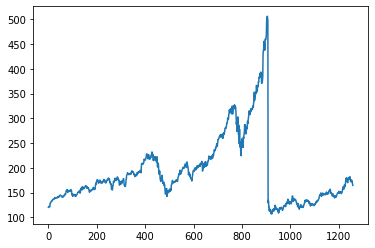

In [12]:
import matplotlib.pyplot as plt
plt.plot(final_df)

In [13]:
import numpy as np

In [14]:
final_df

0       120.08
1       119.97
2       121.88
3       121.94
4       121.95
         ...  
1254    172.19
1255    173.07
1256    169.80
1257    166.23
1258    164.51
Name: close, Length: 1259, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
final_df=scaler.fit_transform(np.array(final_df).reshape(-1,1))

In [16]:
print(final_df)

[[0.03316218]
 [0.03288666]
 [0.03767063]
 ...
 [0.15769568]
 [0.14875391]
 [0.14444584]]


In [17]:
training_size=int(len(final_df)*0.65)
test_size=len(final_df)-training_size
train_data,test_data=final_df[0:training_size,:],final_df[training_size:len(final_df),:1]

In [18]:
training_size,test_size

(818, 441)

In [19]:
train_data

array([[0.03316218],
       [0.03288666],
       [0.03767063],
       [0.03782091],
       [0.03784596],
       [0.03704446],
       [0.03634314],
       [0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.05873513],
       [0.06184095],
       [0.06311835],
       [0.06407013],
       [0.06331872],
       [0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563],
       [0.07479023],
       [0.07581716],
       [0.07436443],
       [0.07469004],
       [0.07536631],
       [0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.08105197],
       [0.08052599],
       [0.08420789],
       [0.08478397],
       [0.08303068],
       [0.08671259],
       [0.08265498],
       [0.0866124 ],
       [0.08536005],
       [0.08465874],
       [0.08525986],
       [0.09257358],
       [0.09337508],
       [0.092

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 402ms/step - loss: 0.0132 - val_loss: 0.0032
Epoch 2/100
12/12 [==============================] - 3s 284ms/step - loss: 0.0033 - val_loss: 0.0059
Epoch 3/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 4/100
12/12 [==============================] - 3s 250ms/step - loss: 0.0010 - val_loss: 0.0033
Epoch 5/100
12/12 [==============================] - 3s 214ms/step - loss: 9.3700e-04 - val_loss: 0.0025
Epoch 6/100
12/12 [==============================] - 3s 261ms/step - loss: 8.4127e-04 - val_loss: 0.0023
Epoch 7/100
12/12 [==============================] - 3s 248ms/step - loss: 8.1272e-04 - val_loss: 0.0020
Epoch 8/100
12/12 [==============================] - 3s 220ms/step - loss: 7.3539e-04 - val_loss: 0.0016
Epoch 9/100
12/12 [==============================] - 4s 312ms/step - loss: 7.1393e-04 - val_loss: 0.0014
Epoch 10/100
12/12 [==============================] - 2s 209ms/step - 

In [29]:
model.save('stacked_lstm.h5')

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.7.0'

In [32]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

202.4837647901856

In [35]:
math.sqrt(mean_squared_error(ytest,test_predict))

140.46040579137656

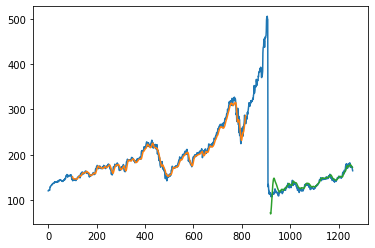

In [36]:
look_back=100
trainPredictPlot = numpy.empty_like(final_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(final_df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(final_df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(final_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

441

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.12485911083281148,
 0.12090169067000628,
 0.11829680651221036,
 0.1055228553537883,
 0.10697557921102063,
 0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044,
 0.08681277395115838,
 0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.09247338760175322,
 0.09517845961177201,
 0.09946149029430179,
 0.10499686912961798,
 0.10624921728240444,
 0.10680025046963049,
 0.10482154038822789,
 0.10469630557294918,
 0.10639949906073881,
 0.10522229179711956,
 0.11453976205385091,
 0.10760175328741389,
 0.10549780839073258,
 0.10815278647

In [41]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15774286]
101
1 day input [0.11268629 0.11438948 0.11724483 0.11887289 0.12485911 0.12090169
 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314 0.10507201
 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281 0.10038823
 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317 0.08090169
 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393 0.08683782
 0.085335   0.09247339 0.09517846 0.09946149 0.10499687 0.10624922
 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229 0.11453976
 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072  0.1113087
 0.10920476 0.1101315  0.10289292 0.10276769 0.10807765 0.10810269
 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445 0.13668128
 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706 0.14256731
 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803 0.181866
 0.17257358 0.16904195 0.18149029 0.16385723 0.16105197 0.15757044
 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525 0.18169067
 0.17873513 0.17715717 0.18827802 0.

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(final_df)

1259

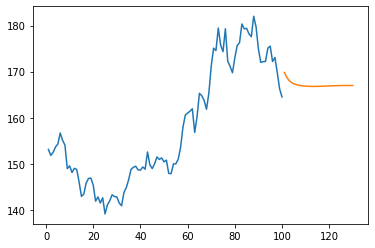

In [46]:
plt.plot(day_new,scaler.inverse_transform(final_df[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
final_graph=final_df.tolist()
final_graph.extend(lst_output)
plt.plot(final_graph[1200:])

In [ ]:
final_graph=scaler.inverse_transform(final_graph).tolist()

In [ ]:
plt.plot(final_graph)